<h2 style="text-align: center; line-height: 0px;">CHBI 422 / 522</h2>
<h3 style="text-align: center; line-height: 0px;">Spring 2022</h3>
<h3 style="text-align: center; line-height: 0px;">Homework 3</h3>
<h4 style="text-align: center; line-height: 0px;">Due date: April 11, 2022 - 23:59</h4>

<hr>

To complete these homework, you will use Google Colab. If you experience any problems please get in touch with the TA: zabali16@ku.edu.tr

**Submission** <br>
After you are done and passed all the test, please submit this notebook to Blackboard. If you are not getting full points from a test, you may be failing some hidden tests. Think about the edge cases (your code might be working in general, but failing for some special cases). Please do not forget to **save** your work before you submit, and **check** whether you are in the final version.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Instructions**<br>

$\color{purple}{\small{\text{Visit the RCSB PDB website (https://www.rcsb.org/).
Use RCSB PDB advanced search to find a protein that has the following properties:}}}$

* It should be an enzyme.
* It should have only a single chain.
* It should have a residue count between 40 and 90.
* The experimental method should be X-ray diffraction.
* The protein should have at least four secondary structures.



---



$\color{red}{\text{Essay Part (Total: 20 points)}}$


$\color{purple}{\small{\text{▶ Which PDB ID did you choose? Put the link for your selected protein in the below text box. (3 points)}}}$

In [2]:
'https://www.rcsb.org/structure/4MDQ'

'https://www.rcsb.org/structure/4MDQ'

4MDQ

$\color{purple}{\small{\text{▶ Find the principal article of the paper. What is the function of the protein as you understand from the paper? What is the main emphasis of the paper, with at most three sentences? (3 points)}}}$

It is a MDM2-p53 Interaction inhibitor enzyme. Protein-protein inhibitor development based on multicomponent reaction chemistry is the main emphasis of this study.

$\color{purple}{\small{\text{▶ What is the EC number of your enzyme, what does it tell you? (3 points)}}}$


EC 6.3.2: 

6- Ligases
6.3 - Forming carbon-nitrogen bonds
6.3.2 -Acid--amino-acid ligases (peptide synthases)



$\color{purple}{\small{\text{▶ How many helices and strands exist in the PDB file? (3 points)}}}$


4 helices and 4 beta sheets

$\color{purple}{\small{\text{▶ Which year was the structure deposited? (3 points)}}}$


2013



---



$\color{red}{\text{Calculations Part - A (Total: 40 points)}}$






$\color{purple}{\small{\text{▶ Read in all coordinates and residue types. You can use your code from Homework 2, or write a new one. (You can add new code cells, as you need, below)}}}$


In [3]:
! wget -O 4MDQ.csv https://raw.githubusercontent.com//sinadadmand/CHBI522/main/3/4MDQ.csv


import numpy as np
import matplotlib.pyplot as plt

def read_pdb_file(file_path):
    """ Read the coordinates of atoms from a PDB file and return a dictionary of coordinate lists 
        You may want to check np.genfromtxt() and its additional parameters, or you can use any 
        file reading method you feel comfortable
        You will need "Atom type", "Residue Number", "X-Y-Z" coordinates 
        Your final output should look like:
        {"Residue number": {"Atom type": [x-y-z coordinates]}}"""
    
    # YOUR CODE HERE
    pdb_dict = {}
    inner_dict = {}
    with open(file_path) as pdbfile:
      for line in pdbfile:
        splitted_line = line.split(sep = ',')
        inner_dict[splitted_line[2]] = [float(splitted_line[6]), float(splitted_line[7]), float(splitted_line[8])]
        pdb_dict[int(splitted_line[5])] = inner_dict.copy()

    return pdb_dict


--2022-04-18 20:40:36--  https://raw.githubusercontent.com//sinadadmand/CHBI522/main/3/4MDQ.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sinadadmand/CHBI522/main/3/4MDQ.csv [following]
--2022-04-18 20:40:36--  https://raw.githubusercontent.com/sinadadmand/CHBI522/main/3/4MDQ.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 13138 (13K) [text/plain]
Saving to: ‘4MDQ.csv’

4MDQ.csv            100%[===================>]  12.83K  --.-KB/s    in 0s      

2022-04-18 20:40:36 (88.5 MB/s) - ‘4MDQ.csv’ saved [13138/13138]



$\color{purple}{\small{\text{▶ Calculate the amino acid composition of the protein (0,5% Ala, etc.)}}}$


In [4]:
seq = []
with open('4MDQ.csv') as pdbfile:
      for line in pdbfile:
        splitted_line = line.split(sep = ',')
        seq.append(splitted_line[3])
for i in set(seq):
  print(i, "%.2f" % (seq.count(i) / len(seq) * 100), '%')


LYS 10.47 %
ASP 4.65 %
SER 4.65 %
PHE 3.49 %
GLY 4.65 %
PRO 3.49 %
ALA 1.16 %
HIS 2.33 %
ARG 4.65 %
GLN 4.65 %
ASN 2.33 %
ILE 4.65 %
THR 5.81 %
LEU 15.12 %
MET 3.49 %
VAL 10.47 %
CYS 1.16 %
GLU 4.65 %
TYR 8.14 %


$\color{purple}{\small{\text{▶ Using the mole fractions, what is the structural class of your protein.}}}$
$\color{purple}{\scriptsize {\text{Hint: What are the highest probabilities that these amino acids will belong to, i.e. helix/strand or both.}}}$


Leu and Lys have the highest fractions which are favorable in alpha helices. Next highests are Val and Tyr whihch are more favorable in Beta strands. Gly, Asn, and Pro also indicate the probability of reverse turns.

$\color{purple}{\small{\text{▶ Evaluate all the bond lengths and torsional angles. (i.e., phi, psi, omega)}}}$


In [5]:
def calculate_phi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the phi angle for the second one
        Return the angle in degrees """

    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    c_2 = np.array(aa2['C'])
    
    l_1 = n_2-c_1
    l_2 = ca_2 - n_2
    l_3 = c_2 - ca_2
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    phi = np.degrees(radians)
    
    if sign != np.sign(phi):
        phi = -1 * phi

    return phi
def calculate_psi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the psi angle for the first one 
        Return the angle in degrees """
    n_1 = np.array(aa1['N'])
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    
    l_1 = ca_1 - n_1
    l_2 = c_1 - ca_1
    l_3 = n_2 - c_1
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    psi = np.degrees(radians)
    
    if sign != np.sign(psi):
        psi = -1 * psi
    return psi
def calculate_omega(aa1, aa2):
    """ Given two consecutive amino acids, calculate the omega angle between them 
        Return the angle in degrees """
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    
    l_1 = c_1 - ca_1 
    l_2 = n_2 - c_1
    l_3 = ca_2 - n_2
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    omega = np.degrees(radians)
    
    if sign != np.sign(omega):
        omega = -1 * omega

    return omega
def calculate_all(protein_dict):
    """ For a given amino acid sequence, calculate all possible phi, psi, omega, theta angles and bond distances,
        vectors, using the functions defined before """
    # YOUR CODE HERE
    phi_list = [None] + [calculate_phi(protein_dict[i], protein_dict[i+1]) for i in range(25,110)]   # we start calculating from 2nd residue since first is not doable (None value added)
    psi_list = [calculate_psi(protein_dict[i], protein_dict[i+1]) for i in range(25,110)] # we finish calculating in the residue one before last since it is not doable (None value added below)
    psi_list.append(None)
    omega_list = [calculate_omega(protein_dict[i], protein_dict[i+1]) for i in range(25,110)]

    return phi_list, psi_list, omega_list


In [6]:
protein = read_pdb_file('4MDQ.csv')
calculate_all(protein)


([None,
  -66.47023165380153,
  -101.53786008262477,
  -120.52691738462258,
  -116.92703623242502,
  -54.081262467145194,
  -67.04391997125522,
  -53.354757918975054,
  -71.02062255160433,
  -64.1807839191272,
  -58.754884932226744,
  -56.675695945367394,
  -62.63381228217756,
  -58.010829665873246,
  -65.55616436532105,
  -65.11368749343795,
  -108.13971046276295,
  92.71527846518639,
  -63.03522434741842,
  -109.39970608594714,
  -105.72739259399603,
  -109.1042460926708,
  -122.40989014292381,
  -147.85098591599572,
  -80.16868817765662,
  -55.16328938884817,
  -63.32277872309608,
  -64.29651807413141,
  -58.955030854750206,
  -60.09379823650076,
  -60.30171042583426,
  -66.11806548709778,
  -60.37450620547656,
  -57.13714792384388,
  -56.490990935641214,
  -60.70678268997815,
  -57.12156300142543,
  -62.78155299802825,
  -68.9694919166584,
  -87.20457057169814,
  52.10535616513053,
  -88.69651522576757,
  -84.84265099452016,
  -68.69356794974631,
  -63.19389246145699,
  -86.7223844

$\color{purple}{\small{\text{▶ Draw the Ramachandran plot of the protein.}}}$


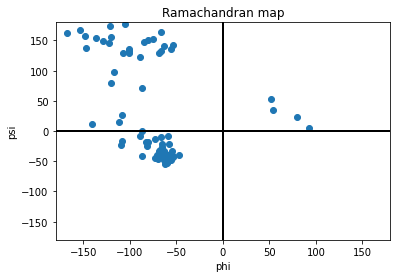

In [7]:
phi_list, psi_list, _ = calculate_all(protein)
plt.scatter(phi_list[:],psi_list[:])  #we draw a scatter plot
plt.ylim(-180,180)  #the limits of the x and y axes will be -180 and 180, it could -360 and 360 as well
plt.xlim(-180,180)
plt.plot([0, 0], [-180, 180], 'k-', lw=2)  #here we put the lines in the middle of the graph and select the color and the line width of these lines
plt.plot([-180, 180], [0, 0], 'k-', lw=2)
plt.xlabel('phi') #we label the axes as Phi and Psi
plt.ylabel('psi')
plt.title('Ramachandran map') #we put the title as Ramachandran map
plt.show()

$\color{purple}{\small{\text{▶ Draw a figure with only alpha carbons displayed using chimera or VMD or your favorite tool. Label the secondary structures and active site. Insert your figure in the cell below.}}}$


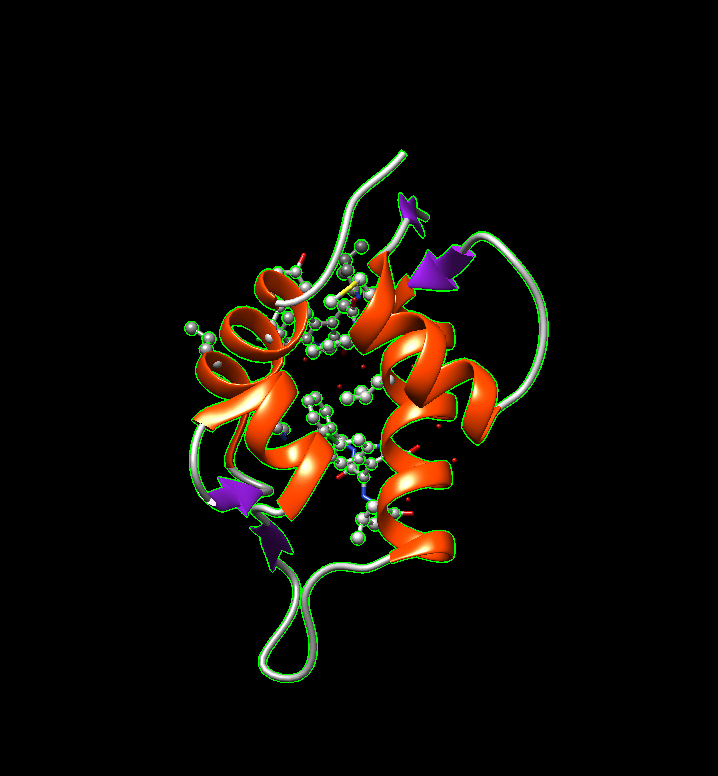



---



$\color{red}{\text{Calculations Part - B (Total: 40 points)}}$

$\color{purple}{\small{\text{▶ Calculate the coordination number of each residue, draw residue versus coordination number for the protein.}}}$

$\color{purple}{\small{\text{If i and j are two amino acids, calculate a contact if and only if } abs(i - j) \geq 4.}}$

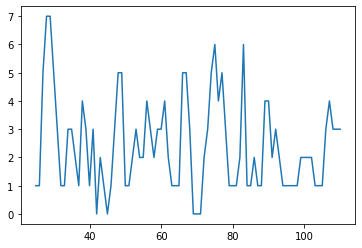

In [8]:
protein = read_pdb_file('4MDQ.csv')
def calculate_len(aa1, aa2):

    c_1 = np.array(aa1['CA'])
    c_2 = np.array(aa2['CA'])
    
    l = c_2 - c_1
    
    l2 = np.linalg.norm(l)
    
    return l2

coo_dic = {}
for i in range(25,111):
  c = 0
  for j in range(25,111):
    if i - j > 3 or j - i > 3:
      if calculate_len(protein[i], protein[j]) < 6.8:
          c +=1
    coo_dic[i] = c

coo_dic

plt.plot(list(coo_dic.keys()), list(coo_dic.values()))
plt.show()

$\color{purple}{\small{\text{▶ Draw the contact map of the protein, indicate which secondary element correspond wherein the map. Which secondary structures contact, shown in the map.}}}$



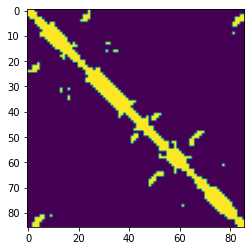

In [9]:
A = np.empty(shape=(86,86), dtype=float)
for i in range(25,111):
  for j in range(25,111):
    if calculate_len(protein[i], protein[j]) < 6.8:
      A[i-25,j-25] = 1
    else:
      A[i-25,j-25] = 0

plt.imshow(A)

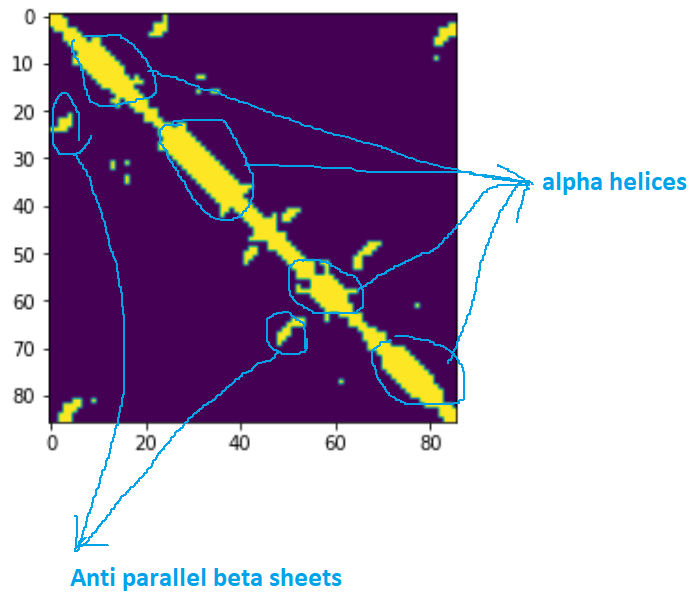

$\color{purple}{\small{\text{▶ Find the accessible surface areas of the residues, you might use any of the following programs:}}}$ <br>


* $\color{purple}{\small{\text{FREESASA}}}$ (https://freesasa.github.io/)
* $\color{purple}{\small{\text{GETAREA}}}$ (http://curie.utmb.edu/getarea.html)
* $\color{purple}{\small{\text{MSMS}}}$ (http://mgltools.scripps.edu/packages/MSMS/)
* $\color{purple}{\small{\text{Any other program of your choice}}}$


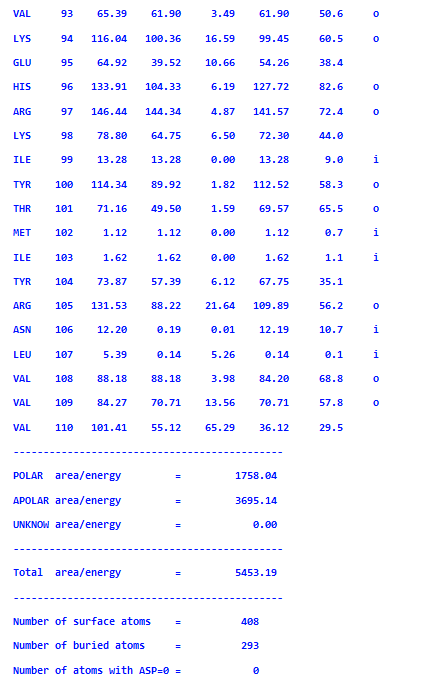

$\color{purple}{\small{\text{▶ Use the following server}}}$ http://expasy.org/tools/protscale.html $\color{purple}{\small{\text{to find the hydrophobicity scale using}}}$ [Kyte & Doolittle](https://web.expasy.org/protscale/pscale/Hphob.Doolittle.html) $\color{purple}{\small{\text{parameters}}}$.

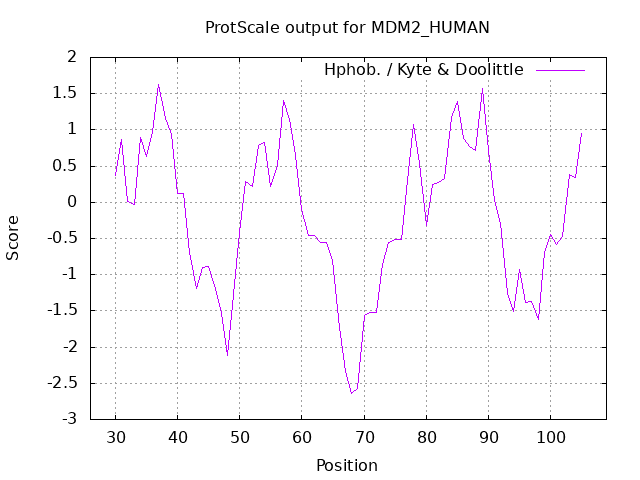

$\color{purple}{\small{\text{▶ Draw the }}}$


$\color{purple}{\small{\text{1. residue versus coordination number}}}$ <br>
$\color{purple}{\small{\text{2. hydrophobicity versus accessible surface area graphs}}}$

$\color{purple}{\small{\text{and see if there is a correlation between them.}}}$



1.

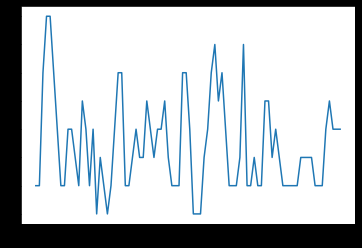

2.

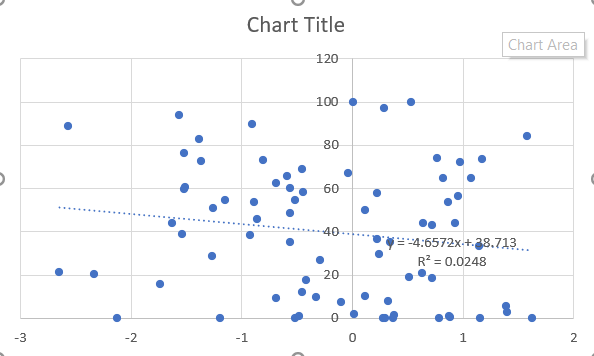

No significant correlation between hydrophobicity and acceible surface area values were seen. I additinaly checked for the correlation between hydrophobicity and coordination numbers and there seems to be a correlation between them.

$\color{purple}{\small{\text{▶ Find the SCOP domain of this protein. We will cover SCOP after folding lectures}}}$


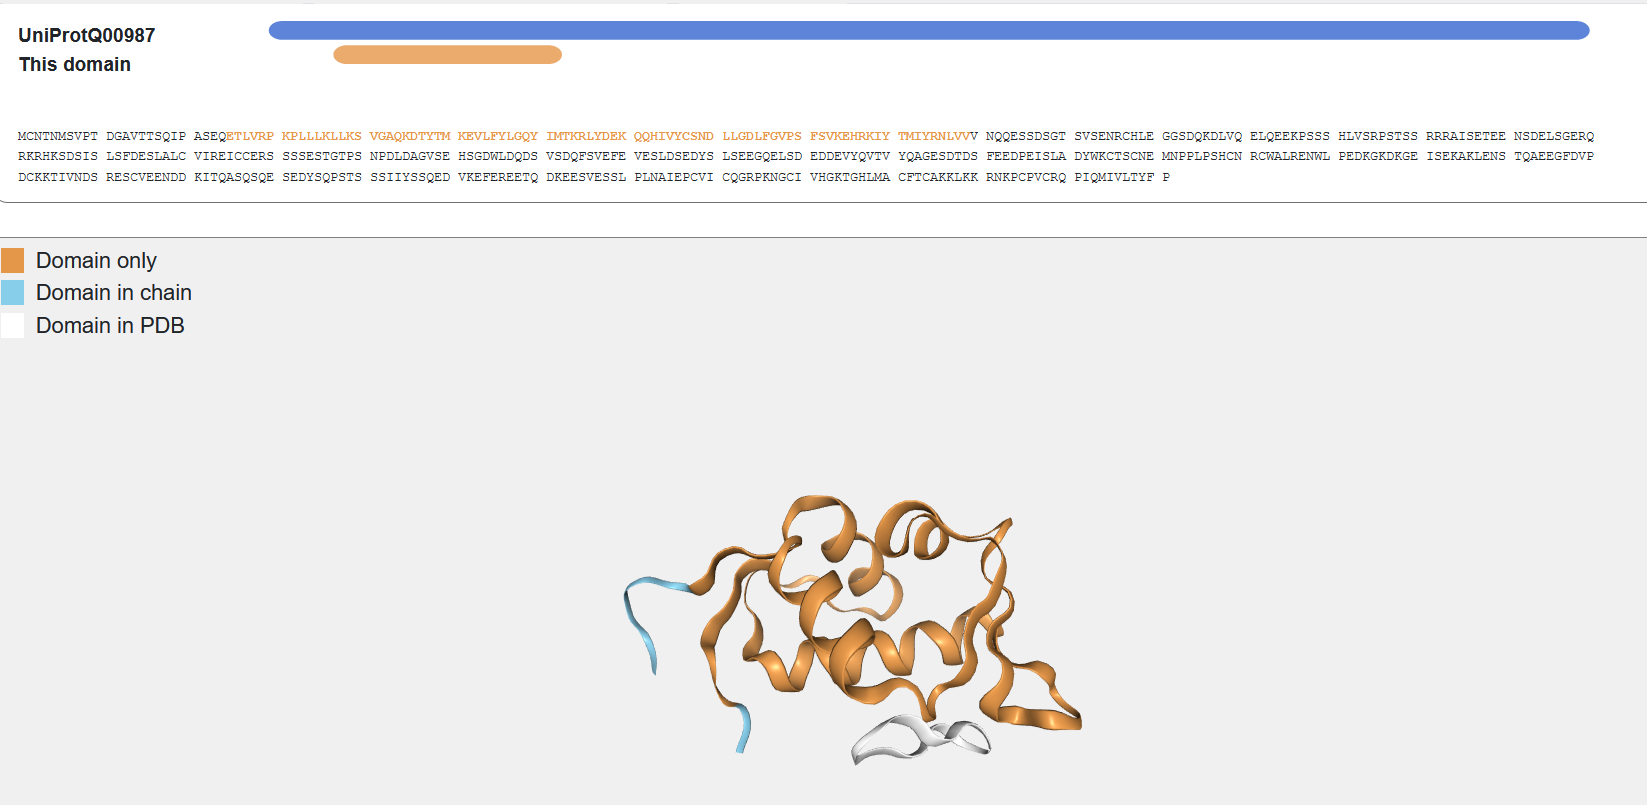



---



**Make sure that you saved your work, download this notebook as .ipynb and upload to Blackboard for submission**